# Curtailment From Eirgrid Data 

In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'my_plot'

In [25]:
#bring in the raw data, this is in MW
df_14_15 = pd.read_excel('data/Eirgrid_data_14_15.xlsx', index_col=0) 
df_16_17 = pd.read_excel('data/Eirgrid_data_16_17.xlsx', index_col=0) 
df_18_19 = pd.read_excel('data/Eirgrid_data_18_19.xlsx', index_col=0) 
df_20_21 = pd.read_excel('data/Eirgrid_data_20_21.xlsx', index_col=0) 


In [26]:
df_14 = df_14_15[df_14_15.index.year.isin([2014])]
df_15 = df_14_15[df_14_15.index.year.isin([2015])]
df_16 = df_16_17[df_16_17.index.year.isin([2016])]
df_17 = df_16_17[df_16_17.index.year.isin([2017])]
df_18 = df_18_19[df_18_19.index.year.isin([2018])]
df_19 = df_18_19[df_18_19.index.year.isin([2019])]
df_20 = df_20_21[df_20_21.index.year.isin([2020])]
df_21 = df_20_21[df_20_21.index.year.isin([2021])]

In [27]:
dfs = [df_14,df_15,df_16,df_17,df_18,df_19,df_20]

In [28]:
d_d = []
sns = []
years = []
installed_cap = []

x = 14

for i in dfs:
    all_ireland = pd.DataFrame()
    all_ireland['Wind Availability'] = i['IE Wind Availability']+i['NI Wind Availability']
    all_ireland['Wind Generation'] = i['IE Wind Generation']+i['NI Wind Generation']
    all_ireland['Demand'] = i['IE Demand']+ i['NI Demand']
    all_ireland['SNSP'] = i['SNSP']
    all_ireland['Curtailment'] = all_ireland['Wind Availability'] - all_ireland['Wind Generation']
    all_ireland[all_ireland['Curtailment'] < 0 ]['Curtailment'] = 0

    dispatch_down = (all_ireland['Curtailment'].sum()/all_ireland['Wind Availability'].sum())*100
    
    installed_cap.append(all_ireland['Wind Availability'].max())
    sns.append(all_ireland['SNSP'].max())
    d_d.append(dispatch_down)
    years.append(x)
    x = x + 1

<ipython-input-28-532450e48f6d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_ireland[all_ireland['Curtailment'] < 0 ]['Curtailment'] = 0
<ipython-input-28-532450e48f6d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_ireland[all_ireland['Curtailment'] < 0 ]['Curtailment'] = 0
<ipython-input-28-532450e48f6d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [32]:
#fitting functions
def linear(x, a, b):
    return a*x + b

def quad(x, a, b, c):
    return a*x**2 + b*x + c

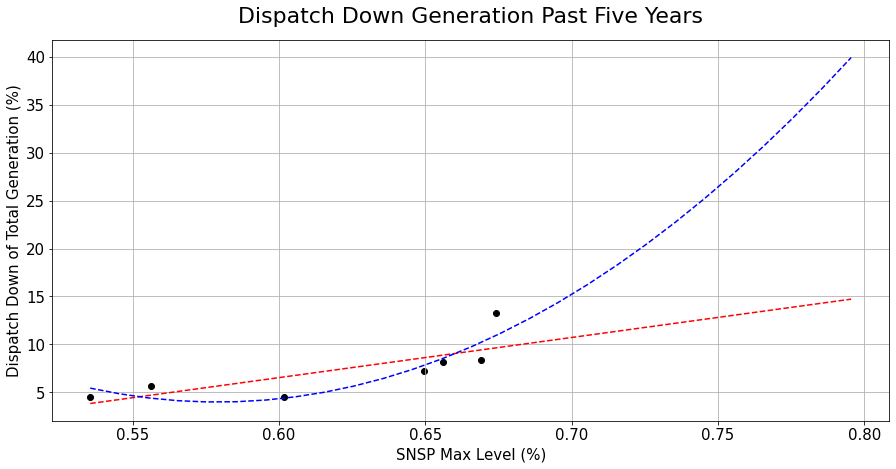

In [36]:
fig,ax = plt.subplots(figsize = [15,7])
ax.set_title("Dispatch Down Generation Past Five Years", fontsize = 22, y=1.03)
ax.set_xlabel("SNSP Max Level (%)", fontsize = 15)
ax.set_ylabel("Dispatch Down of Total Generation (%)", fontsize = 15)
ax.grid(True)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

#plot the linear line
popt, pcov = curve_fit(linear, sns, d_d)
a,b = popt

x_line = np.arange(min(sns), 0.8, 0.01)
y_line = linear(x_line,a,b)

plt.plot(x_line, y_line, '--', color='red')

#plot the quadratic line
popt, pcov = curve_fit(quad, sns, d_d)
a,b,c = popt

x_line = np.arange(min(sns), 0.8, 0.01)
y_line = quad(x_line,a,b,c)

plt.plot(x_line, y_line, '--', color='blue')

#Plot the actual data points
plt.scatter(sns, d_d, color='black')
plt.show()

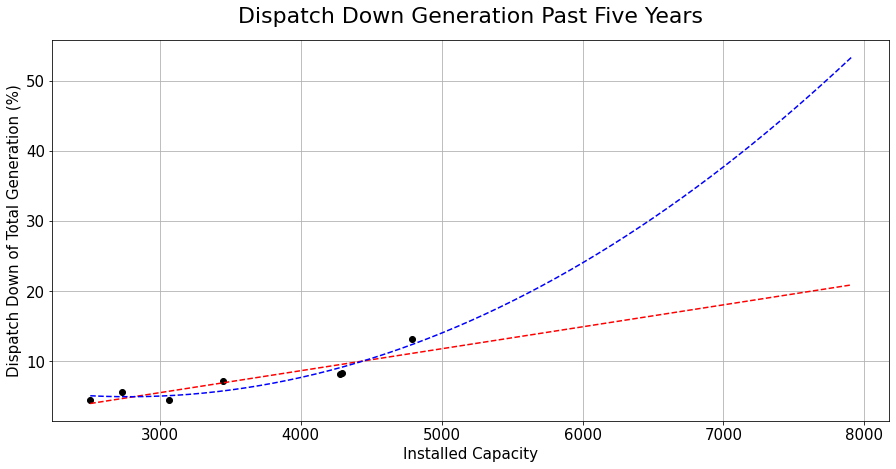

In [38]:
fig,ax = plt.subplots(figsize = [15,7])
ax.set_title("Dispatch Down Generation Past Five Years", fontsize = 22, y=1.03)
ax.set_xlabel("Installed Capacity", fontsize = 15)
ax.set_ylabel("Dispatch Down of Total Generation (%)", fontsize = 15)
ax.grid(True)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

#plot the linear line
popt, pcov = curve_fit(linear, installed_cap, d_d)
a,b = popt

x_line = np.arange(min(installed_cap), 8000, 100)
y_line = linear(x_line,a,b)

plt.plot(x_line, y_line, '--', color='red')

#plot the quadratic line
popt, pcov = curve_fit(quad, installed_cap, d_d)
a,b,c = popt

x_line = np.arange(min(installed_cap), 8000, 100)
y_line = quad(x_line,a,b,c)

plt.plot(x_line, y_line, '--', color='blue')

#Plot the actual data points
plt.scatter(installed_cap, d_d, color='black')
plt.show()